In [18]:
import pandas as pd
# Define column names for the dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the dataset from the CSV file
iris_df = pd.read_csv('iris.csv', header=None, names=column_names)

# Check for missing values
missing_values = iris_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Option 1: Remove rows with missing values
iris_df_cleaned = iris_df.dropna()

# Option 2: Fill missing values for numerical columns with their mean
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df[numerical_columns] = iris_df[numerical_columns].fillna(iris_df[numerical_columns].mean())

# If needed, fill missing values in the 'class' column with the most frequent value
iris_df['class'] = iris_df['class'].fillna(iris_df['class'].mode()[0])

# Verify the dataset is now clean
print("Missing values after cleaning:")
print(iris_df.isnull().sum())


Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64
Missing values after cleaning:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define column names for the dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the dataset from the CSV file
iris_df = pd.read_csv('iris.csv', header=None, names=column_names)

# Define the numerical columns
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform them
iris_df[numerical_columns] = scaler.fit_transform(iris_df[numerical_columns])

# Check the standardized data
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width         class
0     -0.900681     1.032057     -1.341272    -1.312977   Iris-setosa
1     -1.143017    -0.124958     -1.341272    -1.312977   Iris-setosa
2     -1.385353     0.337848     -1.398138    -1.312977   Iris-setosa
3     -1.506521     0.106445     -1.284407    -1.312977   Iris-setosa
4     -1.021849     1.263460     -1.341272    -1.312977   Iris-setosa


In [3]:
# compute summary statistics (mean, median, variance) for each feature, groupted by species
import pandas as pd

# Assuming your dataset is in a CSV file named 'iris.csv'
iris_df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Group the data by species and calculate summary statistics
summary_stats = iris_df.groupby('class').agg(['mean', 'median', 'var'])

# Print the summary statistics
print(summary_stats)

                sepal_length                  sepal_width                   \
                        mean median       var        mean median       var   
class                                                                        
Iris-setosa            5.006    5.0  0.124249       3.418    3.4  0.145180   
Iris-versicolor        5.936    5.9  0.266433       2.770    2.8  0.098469   
Iris-virginica         6.588    6.5  0.404343       2.974    3.0  0.104004   

                petal_length                  petal_width                   
                        mean median       var        mean median       var  
class                                                                       
Iris-setosa            1.464   1.50  0.030106       0.244    0.2  0.011494  
Iris-versicolor        4.260   4.35  0.220816       1.326    1.3  0.039106  
Iris-virginica         5.552   5.55  0.304588       2.026    2.0  0.075433  


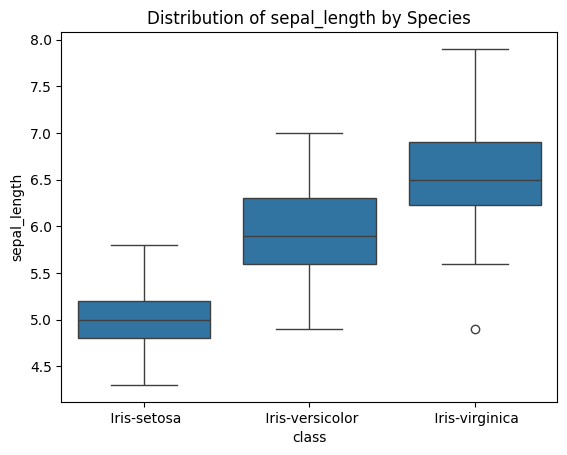

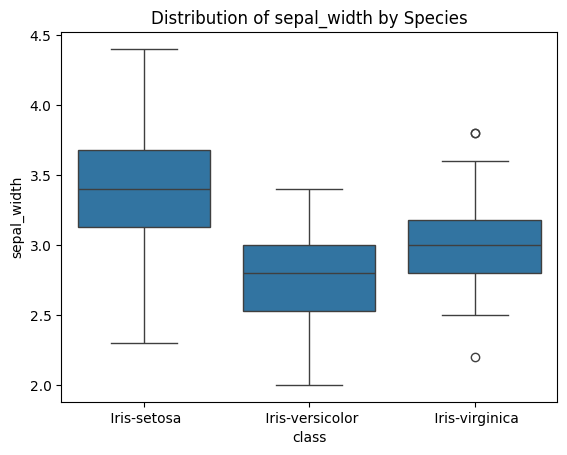

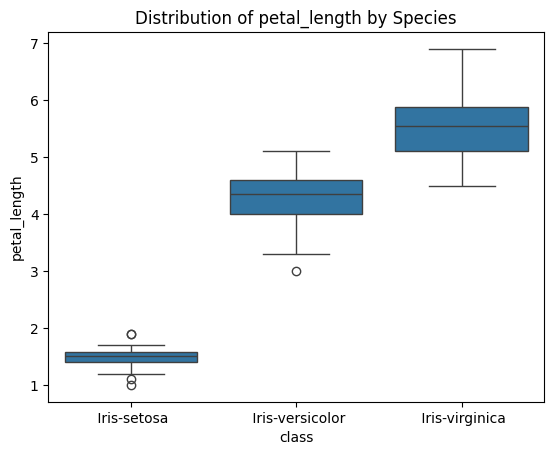

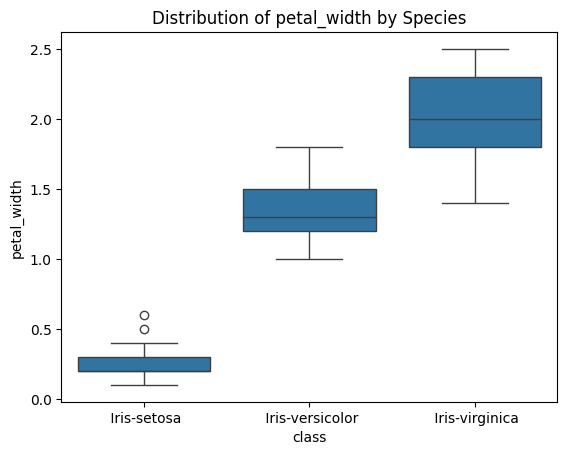

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each feature
for feature in iris_df.columns[:-1]:  # Exclude the 'class' column
    sns.boxplot(x='class', y=feature, data=iris_df)
    plt.title(f'Distribution of {feature} by Species')
    plt.show()

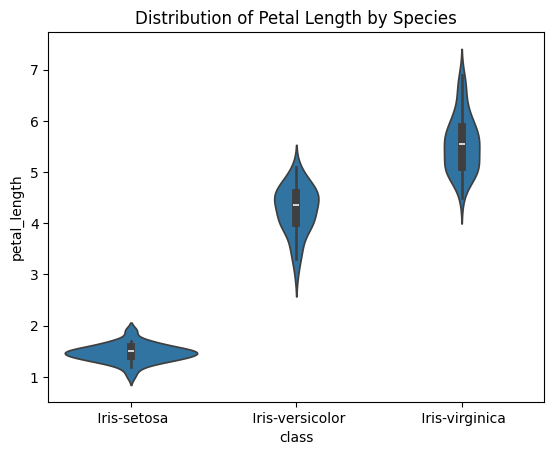

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named 'iris_df'
sns.violinplot(x='class', y='petal_length', data=iris_df)
plt.title('Distribution of Petal Length by Species')
plt.show()

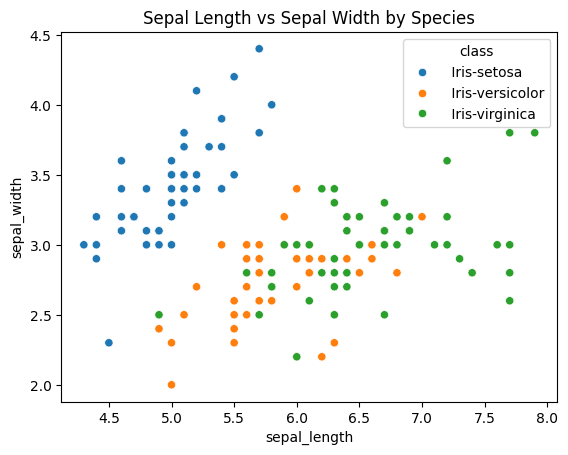

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of sepal_length vs sepal_width, colored by species
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris_df)
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

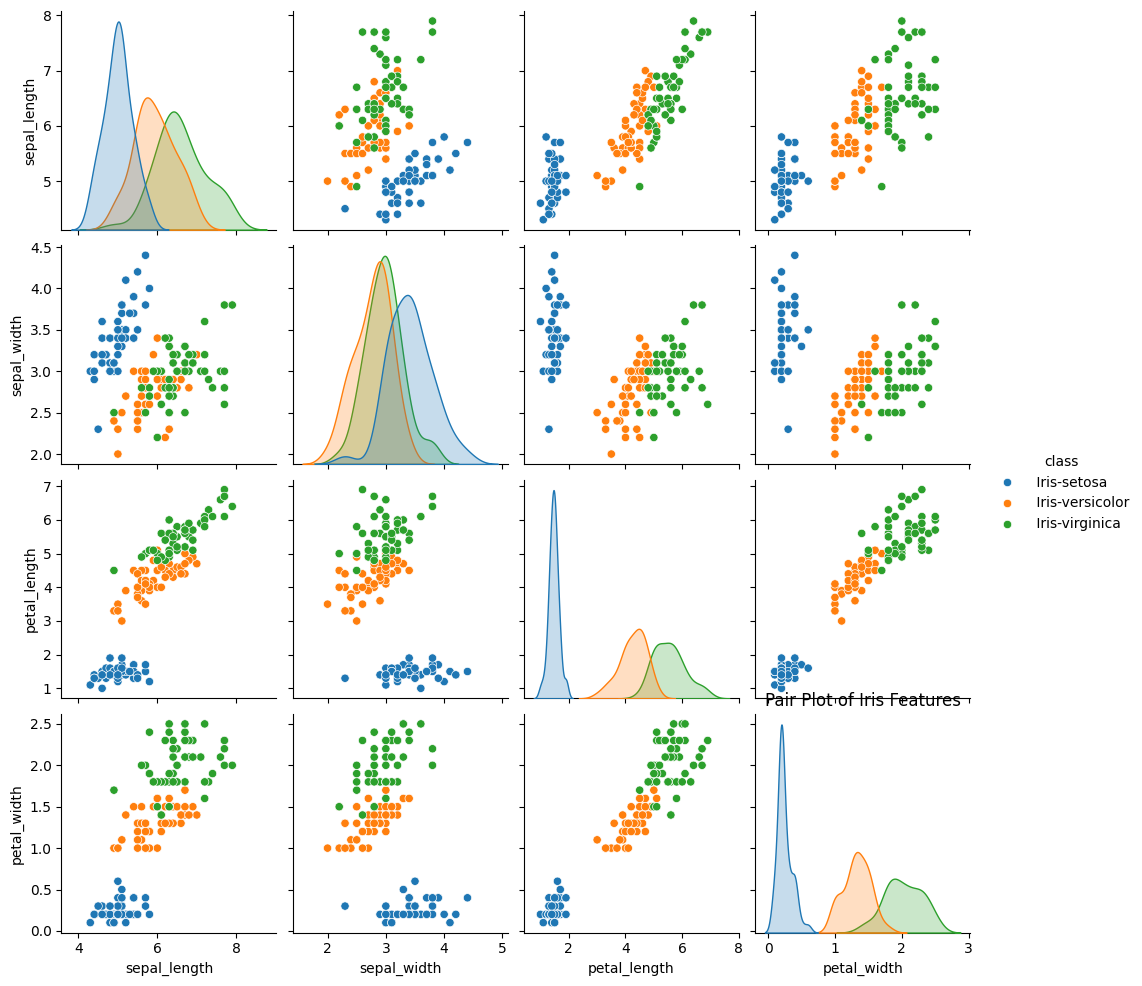

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot of the numerical features, colored by species
sns.pairplot(iris_df, hue='class')
plt.title('Pair Plot of Iris Features')
plt.show()

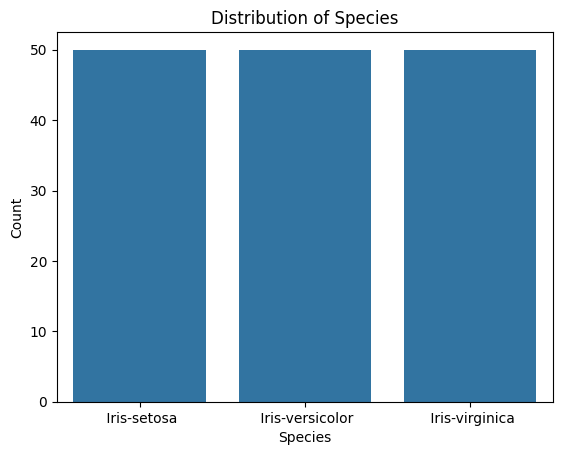

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of samples for each species
species_counts = iris_df['class'].value_counts()

# Create a bar plot
sns.barplot(x=species_counts.index, y=species_counts)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

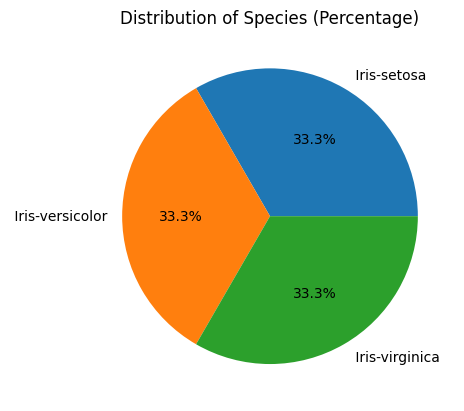

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of samples for each species
species_counts = iris_df['class'].value_counts()

# Calculate the percentage distribution
species_percentages = (species_counts / len(iris_df)) * 100

# Create a pie chart
plt.pie(species_percentages, labels=species_percentages.index, autopct='%1.1f%%')
plt.title('Distribution of Species (Percentage)')
plt.show()

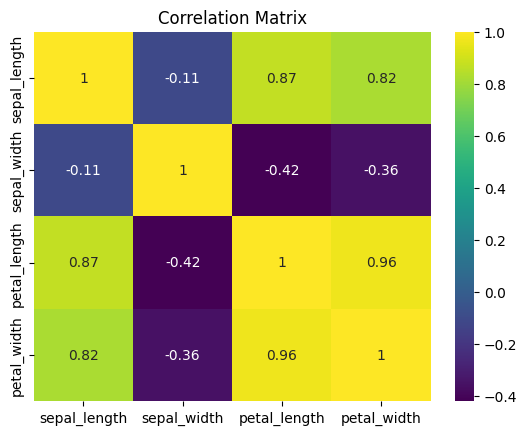

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in a CSV file named 'iris.csv'
iris_df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Handle missing values (if necessary)
iris_df = iris_df.dropna()  # Remove rows with missing values

# Select only the numerical features
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df_numerical = iris_df[numerical_features]

# Calculate the correlation matrix for the numerical features
correlation_matrix = iris_df_numerical.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

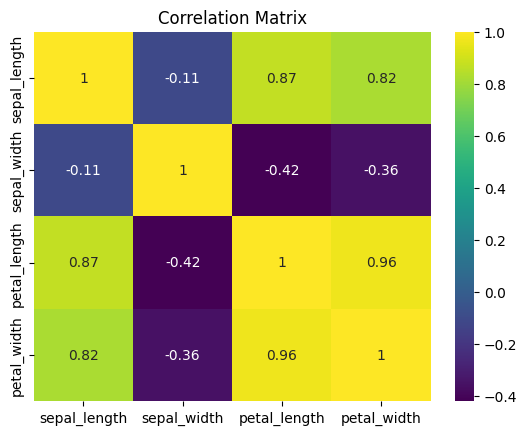

Strong Correlations:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length           NaN          NaN      0.871754     0.817954
sepal_width            NaN          NaN           NaN          NaN
petal_length      0.871754          NaN           NaN     0.962757
petal_width       0.817954          NaN      0.962757          NaN

Correlation Matrix for  Iris-setosa:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.746780      0.263874     0.279092
sepal_width       0.746780     1.000000      0.176695     0.279973
petal_length      0.263874     0.176695      1.000000     0.306308
petal_width       0.279092     0.279973      0.306308     1.000000

Correlation Matrix for  Iris-versicolor:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.525911      0.754049     0.546461
sepal_width       0.525911     1.000000      0.560522     0.663999
petal_length      0.754049  

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in a CSV file named 'iris.csv'
iris_df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Handle missing values (if necessary)
iris_df = iris_df.dropna()

# Select only the numerical features
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df_numerical = iris_df[numerical_features]

# Calculate the correlation matrix for the numerical features
correlation_matrix = iris_df_numerical.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# Interpret the strongest correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
strong_correlations = strong_correlations[strong_correlations != 1]  # Exclude perfect correlations
print("Strong Correlations:")
print(strong_correlations)

# Group by species and calculate correlation matrices
for species in iris_df['class'].unique():
    species_df = iris_df[iris_df['class'] == species]
    species_correlation_matrix = species_df[numerical_features].corr()
    print(f"\nCorrelation Matrix for {species}:")
    print(species_correlation_matrix)

In [12]:
import pandas as pd

# Assuming your dataset is in a DataFrame named 'iris_df'
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Now, the 'iris_df' DataFrame will have the new columns 'sepal_ratio' and 'petal_ratio'
print(iris_df.head())  # Display the first few rows

   sepal_length  sepal_width  petal_length  petal_width         class  \
0           5.1          3.5           1.4          0.2   Iris-setosa   
1           4.9          3.0           1.4          0.2   Iris-setosa   
2           4.7          3.2           1.3          0.2   Iris-setosa   
3           4.6          3.1           1.5          0.2   Iris-setosa   
4           5.0          3.6           1.4          0.2   Iris-setosa   

   sepal_ratio  petal_ratio  
0     1.457143          7.0  
1     1.633333          7.0  
2     1.468750          6.5  
3     1.483871          7.5  
4     1.388889          7.0  


In [13]:
# Group by species and calculate the average sepal_ratio and petal_ratio
average_ratios = iris_df.groupby('class')[['sepal_ratio', 'petal_ratio']].mean()

# Find the species with the largest average sepal_ratio and petal_ratio
largest_sepal_ratio_species = average_ratios['sepal_ratio'].idxmax()
largest_petal_ratio_species = average_ratios['petal_ratio'].idxmax()

# Print the results
print("Species with the largest average sepal ratio:", largest_sepal_ratio_species)
print("Species with the largest average petal ratio:", largest_petal_ratio_species)


Species with the largest average sepal ratio:  Iris-virginica
Species with the largest average petal ratio:  Iris-setosa


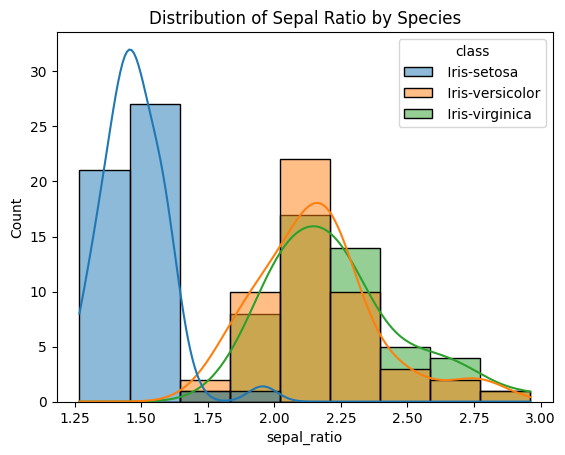

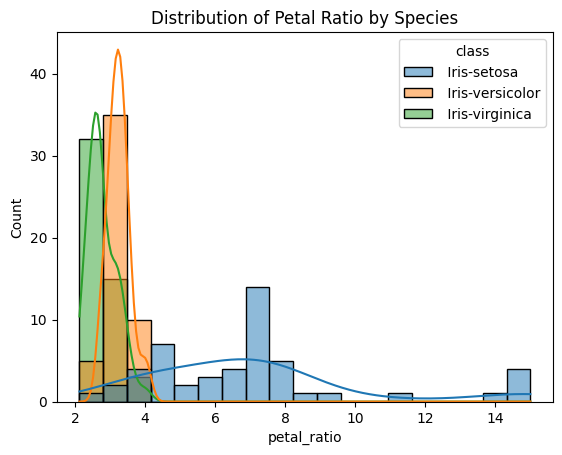

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for sepal_ratio and petal_ratio, separated by species
sns.histplot(data=iris_df, x='sepal_ratio', hue='class', kde=True)
plt.title('Distribution of Sepal Ratio by Species')
plt.show()

sns.histplot(data=iris_df, x='petal_ratio', hue='class', kde=True)
plt.title('Distribution of Petal Ratio by Species')
plt.show()

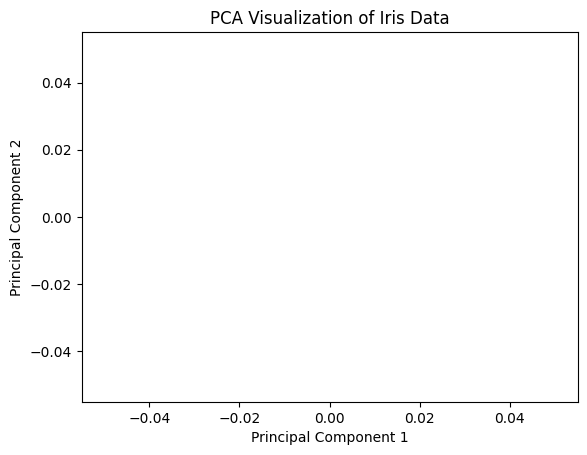

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named 'iris_df'
iris_df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Standardize the numerical features
scaler = StandardScaler()
iris_df_standardized = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Apply PCA with 2 components
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df_standardized)

# Create a scatter plot of the first two principal components
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Data')
plt.show()


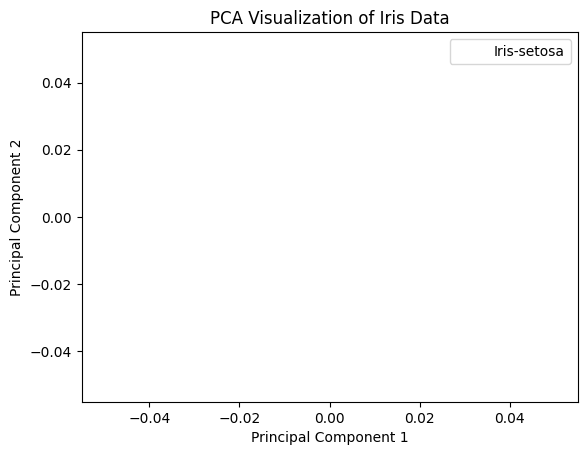

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named 'iris_df'
iris_df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Standardize the numerical features
scaler = StandardScaler()
iris_df_standardized = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Apply PCA with 2 components
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df_standardized)

# Create a scatter plot of the first two principal components
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Data')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

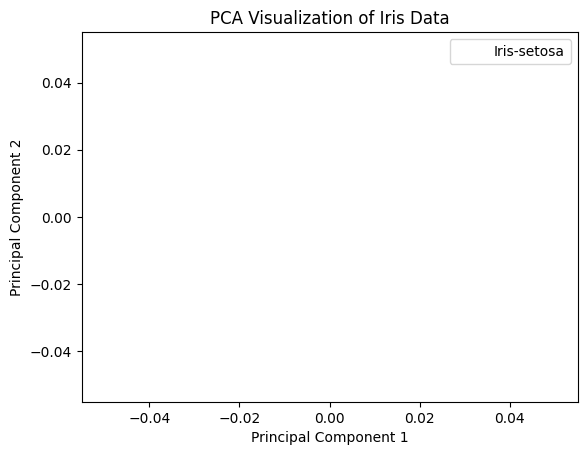

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your dataset is in a CSV file named 'iris.csv'
iris_df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Standardize the numerical features
scaler = StandardScaler()
iris_df_standardized = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Apply PCA with 2 components
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df_standardized)

# Create a scatter plot of the first two principal components
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Data')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()